In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import lognorm


In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from episiming.compartimentais import F
import episiming

In [3]:
def kappa_p(t, periodo_incubacao = -1, periodo_infeccao = 5):
    b = (t < periodo_incubacao + periodo_infeccao)
    c = (t > periodo_incubacao)
    return np.logical_and(b,c).astype(int)

In [4]:
def kappa_testing(t):
    return t/100

In [5]:
1/2.6

0.3846153846153846

In [6]:
np.log(np.log(2)/0.3846153846153846), np.sqrt(-2*np.log(np.log(2)))

(0.588998524445772, 0.8561692830061872)

In [7]:
'η = δ γ'

'η = δ γ'

In [8]:
loc = 0.2
fator = 3.5
delta = [-0.7, -0.72, -0.74, -0.76, 0.588998524445772]
eta = [1.6, 1.8, 2, 2.2, 0.8561692830061872]
kappa0 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[0]), scale=eta[0], loc=loc)
kappa1 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[1]), scale=eta[1], loc=loc)
kappa2 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[2]), scale=eta[2], loc=loc)
kappa3 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[3]), scale=eta[3], loc=loc)
kappa4 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[4]), scale=eta[4], loc=loc)
kappa5 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[5]), scale=eta[5], loc=loc)
kappas = [ kappa0, kappa1, kappa2, kappa3, kappa4, kappa5]

In [9]:
t_0 = 0
dt = 1
num_dt = 60
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

In [10]:
redes_completas = [episiming.cenarios.RedeCompleta(300, 20, 0.5, 0.1, kappa = kappa) for kappa in kappas]

δ = -0.7, η = 1.6


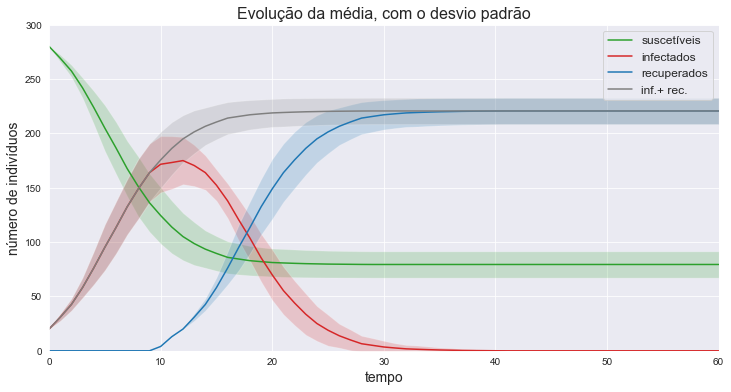

In [11]:
i = 0
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.72, η = 1.8


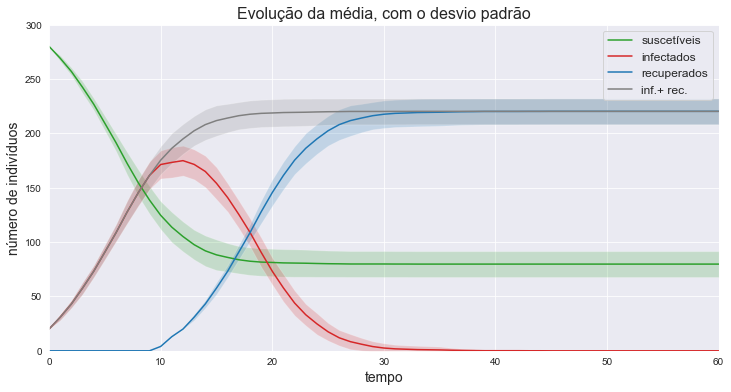

In [12]:
i = 1
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.74, η = 2


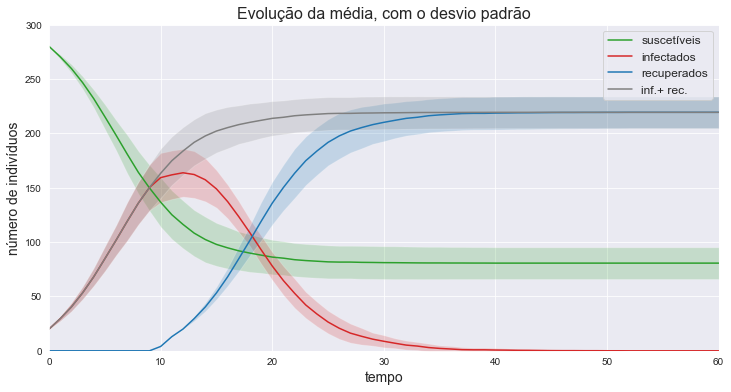

In [13]:
i = 2
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.76, η = 2.2


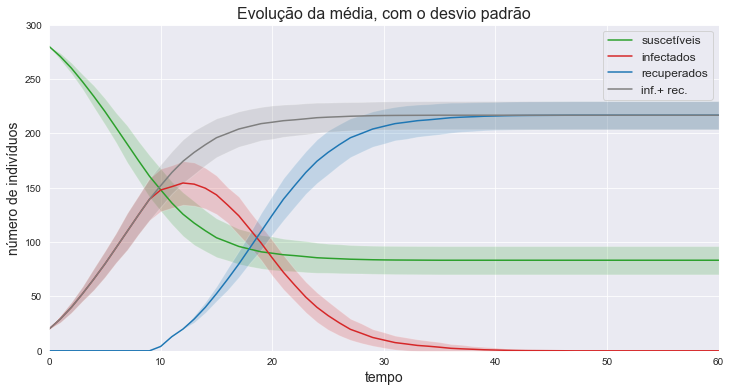

In [14]:
i = 3
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = 0.588998524445772, η = 0.8561692830061872


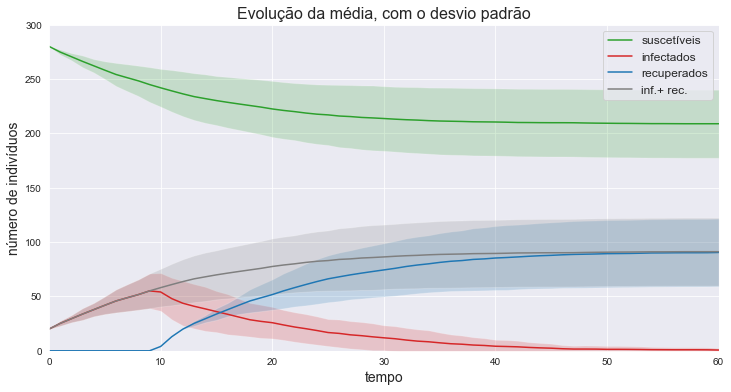

In [15]:
i = 4
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')